In [1]:
from preprocessed_mnist import load_dataset
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from matplotlib import animation, rc
import matplotlib_utils
from IPython.display import HTML, display_html
import matplotlib.pyplot as plt
# set tensorflow session
s = tf.InteractiveSession()
x_train, y_train, X_val, y_val, x_test, y_test = load_dataset()

Using TensorFlow backend.


# Add a hidden layer.

## 1. data process

In [17]:
Y_train = s.run(tf.one_hot(y_train,depth=10))
Y_test = s.run(tf.one_hot(y_test,depth=10))
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

## 2. Neural Network Model

In [18]:
# set parameters
hidden_layer1_num = 300
#hidden_layer2_num = 50
output_layer_num = 10

input_X = tf.placeholder(tf.float32, shape = (None,X_train.shape[1]))
input_y = tf.placeholder(tf.float32, shape = (None,10))


weights1 = tf.get_variable('W1', [X_train.shape[1],hidden_layer1_num], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b1 = tf.Variable(tf.constant(0.1,shape=[hidden_layer1_num]))
#weights2 = tf.Variable(tf.random_normal([hidden_layer1_num, hidden_layer2_num]))
#b2 = tf.Variable(tf.constant(0.1,shape=[hidden_layer2_num]))

weights3 = tf.get_variable('W3', [hidden_layer1_num,output_layer_num], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b3 = tf.Variable(tf.constant(0.1, shape=[output_layer_num]))

# select a Activation function
a1 = tf.nn.tanh(tf.matmul(input_X,weights1)+ b1 )
#a2 = tf.nn.tanh(tf.matmul(a1,weights2)+ b2 )

predicted_y = tf.nn.softmax(tf.matmul(a1, weights3) + b3)

print(predicted_y)
## define the cross entroy loss
loss = -tf.reduce_mean(input_y* tf.log(tf.clip_by_value(predicted_y, 1e-10, 1.0)))
print(loss)
## difine optimizer
#optimizer = tf.train.MomentumOptimizer(0.01, 0.5).minimize(loss, var_list = [weights1,b1,weights2,b2])
optimizer = tf.train.AdamOptimizer(0.001).minimize(loss, var_list = [weights1,b1,weights3,b3])

correct = tf.equal(tf.argmax(predicted_y,1), tf.argmax(input_y,1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

Tensor("Softmax_3:0", shape=(?, 10), dtype=float32)
Tensor("Neg_3:0", shape=(), dtype=float32)


## 3.Training Model

In [19]:
# init varables
s.run(tf.global_variables_initializer())

# number of iteration
STEPS = 30000
batch_size = 30
dataset_size = X_train.shape[0] #50000

accuracy_train = []
accuracy_test = []
for i in range(STEPS):
    
    # batch gradient descent
    start = (i * batch_size) % dataset_size
    end = min(start + batch_size, dataset_size)
    s.run(optimizer, {input_X: X_train[start:end], input_y: Y_train[start:end]})
    
    # print the loss in the training process
    if i % 500 == 0:
        #loss_i = s.run(loss, {input_X: X_train, input_y: Y_train})
        #loss_list.append(loss_i)
        #print("loss at iter %i:%.4f" % (i, loss_i))
        #print("train auc:", roc_auc_score(Y_train, s.run(predicted_y, {input_X:X_train})))
        #print("test auc:", roc_auc_score(Y_test, s.run(predicted_y, {input_X:X_test})))
        accuracy_test.append(s.run(accuracy, {input_X:X_test, input_y: Y_test}))
        accuracy_train.append(s.run(accuracy, {input_X:X_train, input_y: Y_train}))


accuracy_train: 0.998300 ; accuracy_test: 0.977000 


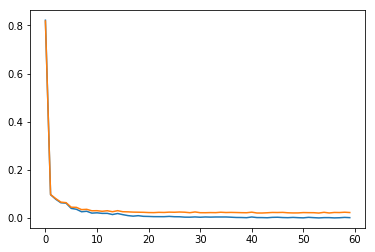

In [27]:
%matplotlib inline
print('accuracy_train: %f ; accuracy_test: %f ' %(accuracy_train[-1] ,accuracy_test[-1]))
plt.plot(range(len(accuracy_train)),[1-x for x in accuracy_train])
plt.plot(range(len(accuracy_test)),[1-x for x in accuracy_test])

In [14]:
s.close()